# BSM Call and Put Values for a European Option

### Load Relevant Libraries

In [1]:
import numpy as np                           # For its math capabilities
import matplotlib as mpl                     # Plotting using matplotlib
import matplotlib.pyplot as plt              # Plotting using matplotlib.pyplot
%matplotlib inline                           
from scipy.integrate import quad             # For quadratic integration (CDF)
import mpl_toolkits.mplot3d.axes3d as p3     # For 3D visualizations
from IPython.external import mathjax         # For LaTeX and Math

### Functions to determine European Option Price as a function of:
- Underlying Price ($S_t$)
- Strike Price ($K$)
- Valuation Date ($t$)
- Maturity Date ($T$)
- Risk free rate ($r$)
- Volatility ($\sigma$)

In [2]:
def dN(x) -> float:
    ''' Probability density function of standard normal random variable x.'''
    return np.exp(-0.5 * x ** 2) / np.sqrt(2 * np.pi)

def N(d) -> float:
    ''' Cumulative density function of standard normal random variable x. 
        Integral of the Gaussian density function between -Infinity and d.
    '''    
    return quad(lambda x: dN(x), -np.Inf, d)[0]

def d1_func(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Black-Scholes-Merton d1 function.'''
    d1 = (np.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * np.sqrt(T - t))
    
    return d1

def d2_func(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    '''Black-Scholes-Merton d2 function.'''
    d1 = d1_func(St, K, t, T, r, sigma)
    d2 = d1 - sigma * np.sqrt(T - t)
    
    return d2

def BSM_call(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Calculates Black-Scholes-Merton European call option value.
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity; T > t
    r:  float -> constant, risk-less short rate
    sigma:  float -> volatility
    
    Returns
    =======
    call_value:  float -> European call present value at t
    '''
    d1 = d1_func(St, K, t, T, r, sigma)
    d2 = d2_func(St, K, t, T, r, sigma)
    call_value = St * N(d1) - np.exp(-r * (T - t)) * K * N(d2)
    
    return call_value

def BSM_put(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Calculates Black-Scholes-Merton European put option value (relying on put-call parity).
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity; T > t
    r:  float -> constant, risk-less short rate
    sigma: float -> volatility
    
    Returns
    =======
    put_value: float -> European put present value at t
    '''
    put_value = BSM_call(St, K, t, T, r, sigma) - St + np.exp(-r * (T - t)) * K
    
    return put_value

### Function to plot variation in option prices with respect to parameters

In [3]:
def plot_values(function, 
                St = 100.0,     # Underlying Price 
                K = 100.0,      # Strike Price
                t = 0.0,        # Valuation date
                T = 1.0,        # Maturity date
                r = 0.05,       # risk-free rate
                sigma = 0.3):   # volatility
    
    ''' Plots European option values for different parameters. '''
    plt.figure(figsize=(10, 8.3))
    points = 1000

    # C(K) plot
    plt.subplot(221)
    klist = np.linspace(50, K + 50, points)
    vlist = [function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')
    
    # C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, T, points)
    vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')
    
    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, r + 0.20, points)
    vlist = [function(St, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')
    
    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, sigma * 5, points)
    vlist = [function(St, K, t, T, r, sigma) for sigma in slist] 
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()

### Call-option price variation with respect to:
- Strike Price ($K$)
- Time to maturity ($T-t$)
- Short rate ($r$)
- Volatility ($\sigma$)


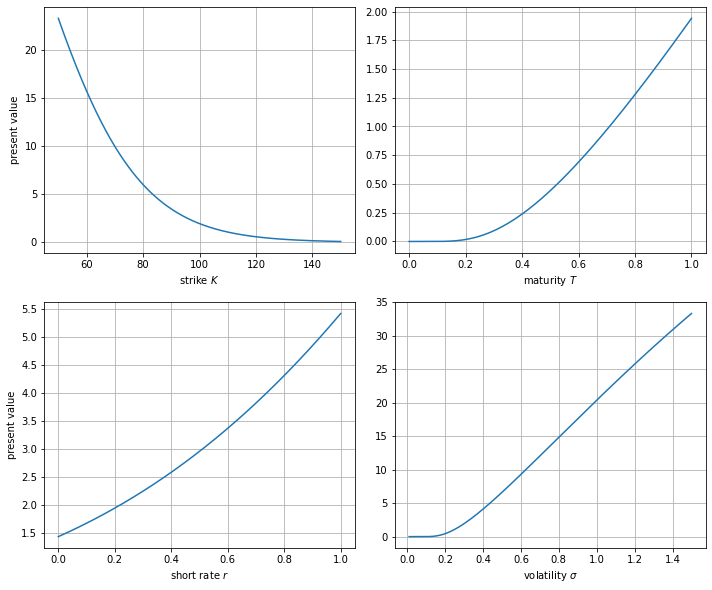

In [4]:
plot_values(BSM_call, 
            St = 70.0,
            K = 100.0,
            t = 0.0,
            T = 1.0,
            r = 0.05,
            sigma = 0.3)

### Put-option price variation with respect to:
- Strike Price ($K$)
- Time to maturity ($T-t$)
- Short rate ($r$)
- Volatility ($\sigma$)

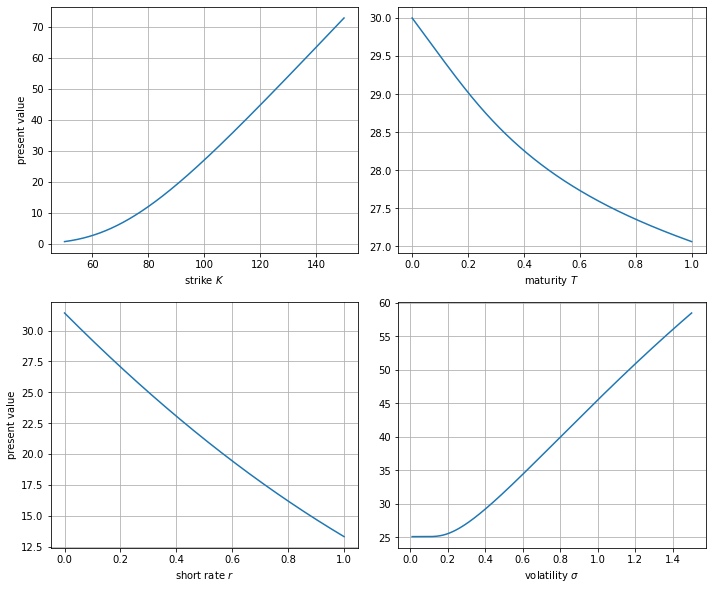

In [5]:
plot_values(BSM_put, 
            St = 70.0,
            K = 100.0,
            t = 0.0,
            T = 1.0,
            r = 0.05,
            sigma = 0.3)

# BSM Call Option - Greeks

In [6]:
def BSM_delta(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Black-Scholes-Merton DELTA of European call option. 
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity/time-to-maturity if t = 0; T > t
    r:  float -> constant, risk-less short rate
    sigma:  float -> volatility
    
    Returns
    =======
    delta:  float -> European call option DELTA
    '''
    
    d1 = d1_func(St, K, t, T, r, sigma)
    delta = N(d1)
    
    return delta

def BSM_gamma(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Black-Scholes-Merton GAMMA of European call option.
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity/time-to-maturity if t = 0; T > t
    r:  float -> constant, risk-less short rate
    sigma:  float -> volatility
    
    Returns
    =======
    gamma:  float -> European call option GAMMA
    '''
    d1 = d1_func(St, K, t, T, r, sigma)
    gamma = dN(d1) / (St * sigma * np.sqrt(T - t))
    
    return gamma

def BSM_theta(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Black-Scholes-Merton THETA of European call option.
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity/time-to-maturity if t = 0; T > t
    r:  float -> constant, risk-less short rate
    sigma:  float -> volatility
    
    Returns
    =======
    theta:  float -> European call option THETA
    '''
    d1 = d1_func(St, K, t, T, r, sigma)
    d2 = d2_func(St, K, t, T, r, sigma)
    theta = -(St * dN(d1) * sigma / (2 * np.sqrt(T - t)) + r * K * np.exp(-r * (T - t)) * N(d2))
    
    return theta

def BSM_rho(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Black-Scholes-Merton RHO of European call option.
    
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity/time-to-maturity if t = 0; T > t
    r:  float -> constant, risk-less short rate
    sigma:  float -> volatility
    
    Returns
    =======
    rho:  float -> European call option RHO
    '''
    d1 = d1_func(St, K, t, T, r, sigma)
    d2 = d2_func(St, K, t, T, r, sigma)
    rho = K * (T - t) * np.exp(-r * (T - t)) * N(d2)
    
    return rho

def BSM_vega(St: float, K: float, t: float, T: float, r: float, sigma: float) -> float:
    ''' Black-Scholes-Merton VEGA of European call option.
    Parameters
    ==========
    St: float -> stock/index level at time t
    K:  float -> strike price
    t:  float -> valuation date
    T:  float -> date of maturity/time-to-maturity if t = 0; T > t
    r:  float -> constant, risk-less short rate
    sigma:  float -> volatility
    
    Returns
    =======
    vega:  float -> European call option VEGA
    '''
    d1 = d1_func(St, K, t, T, r, sigma)
    vega = St * dN(d1) * np.sqrt(T - t)
    
    return vega


### Plotting the Greeks
- Delta ($\delta$)
- Gamma ($\gamma$)
- Theta ($\theta$)
- Rho ($\rho$)
- Vega ($\nu$)

In [7]:
def plot_greeks(function,
                St = 100.0,     # Underlying Price 
                K = 100.0,      # Strike Price
                t = 0.0,        # Valuation date
                T = 1.0,        # Maturity date
                r = 0.05,       # risk-free rate
                sigma = 0.3):   # volatility
    
    # Greek Calculations
    tlist = np.linspace(0.01, 1, 100)
    klist = np.linspace(K-50, K+50, 100)
    V = np.zeros((len(tlist), len(klist)), dtype=np.float)
    for j in range(len(klist)):
        for i in range(len(tlist)):
            V[i, j] = function(St, klist[j], t, tlist[i], r, sigma)
    
    # 3D Plotting
    x, y = np.meshgrid(klist, tlist)
    fig = plt.figure(figsize=(9, 5))
    plot = p3.Axes3D(fig)
    plot.plot_wireframe(x, y, V)
    plot.set_xlabel('strike $K$')
    plot.set_ylabel('maturity $T$')
    plot.set_zlabel('%s(K, T)' % function.__name__)


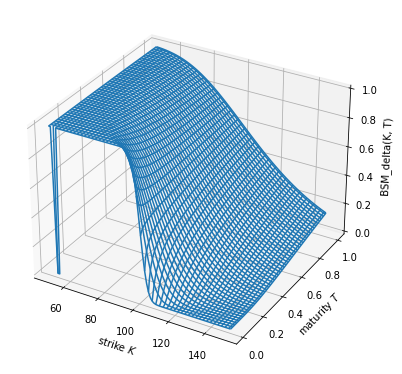

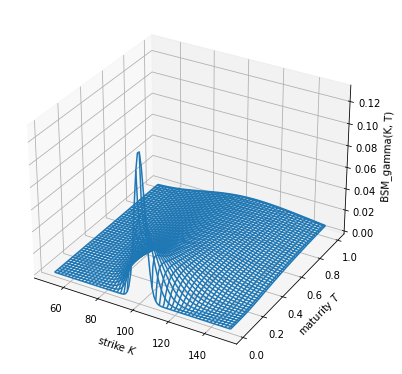

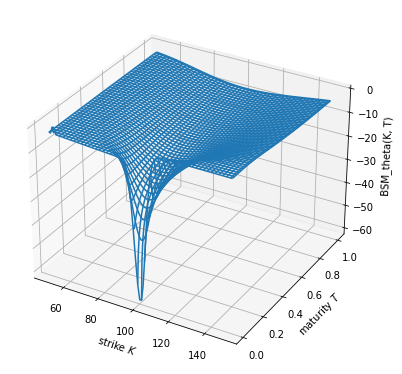

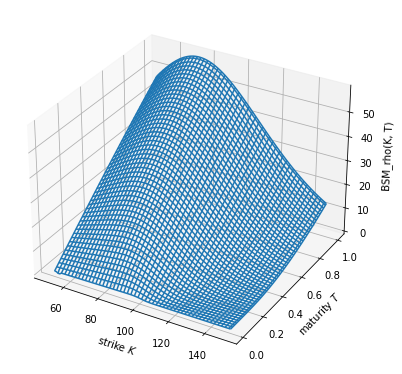

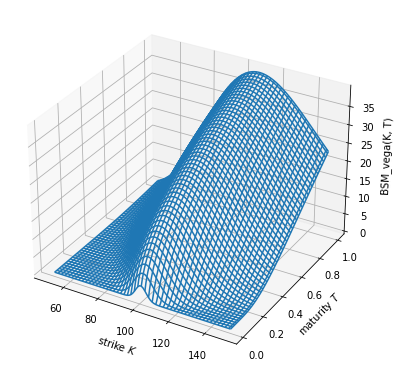

In [8]:
plot_greeks(BSM_delta)
plot_greeks(BSM_gamma)
plot_greeks(BSM_theta)
plot_greeks(BSM_rho)
plot_greeks(BSM_vega)